# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Loading data set
url='http://bit.ly/w-data'
df=pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Checking the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Exploring the variables

Text(0.5, 1.0, 'Score Dsitribution')

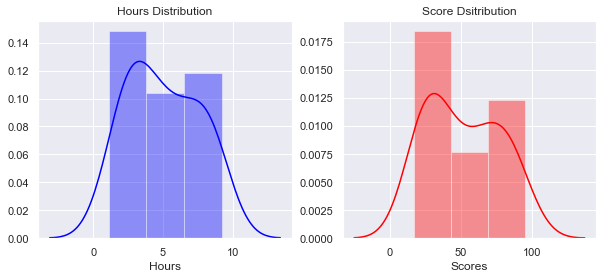

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
p1 = sns.distplot(df['Hours'],label='Hours',color='blue')
plt.title('Hours Distribution')
plt.subplot(1,2,2)
p2 = sns.distplot(df['Scores'],label='Scores',color='red')
plt.title('Score Dsitribution')

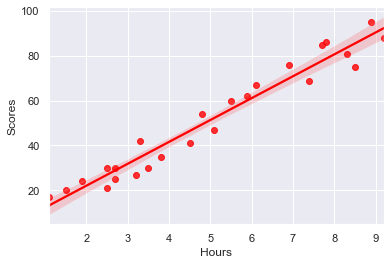

In [7]:
sns.regplot(x=df['Hours'],y=df['Scores'],color='red')

# Declare The Inputs And Targets

In [9]:
x = df.iloc[:, :-1]
y = df.iloc[:, 1]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [15]:
prediction1 = reg.predict(x_test)
prediction1

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [17]:
compare = pd.DataFrame({'Actual':y_test})
compare.reset_index(drop=True,inplace=True)
compare['Predicted1']=prediction1
compare['Deviation']=abs(compare['Actual']-compare['Predicted1'])
compare

,Actual,Predicted1,Deviation
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


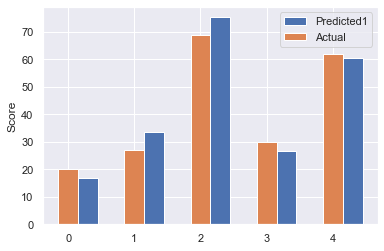

In [18]:
plt.bar(np.arange(5)+0.3,compare.Predicted1,width=0.3,label='Predicted1')
plt.bar(np.arange(5),compare.Actual,width=0.3,label='Actual')
plt.ylabel('Score')
plt.legend()

# Evaluation

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE1 = mean_absolute_error(prediction1 , y_test)
RMSE1 = np.sqrt(mean_squared_error(prediction1 , y_test))
print('Mean Absolute Error = ',MAE1.round(3))
print('Root Mean Squared Error = ',RMSE1.round(3))

Mean Absolute Error =  4.184
Root Mean Squared Error =  4.647


# Percentage of marks for studying  9.25 hrs

In [24]:
n = float(input())
Score = reg.predict([[n]])
print ('After Studying For {} Hours, The Estimated Score Should be \n{}'.format(n,Score.round(2)))

9.25
After Studying For 9.25 Hours, The Estimated Score Should be 
[93.69]
